## Analysis of Top 3 Countries by ARPI_D14

- US:
  - Highest average ARPI_D14: 0.336
  - Total installs: 18023
  - Average CPI: 16452.685
  - Average ROAS_D14: 0.00003
- GB:
  - Highest average ARPI_D14: 0.156
  - Total installs: 3112
  - Average CPI: 2092.107
  - Average ROAS_D14: 0.00014
- DE:
  - Highest average ARPI_D14: 0.121
  - Total installs: 6088
  - Average CPI: 3103.002
  - Average ROAS_D14: 0.00008


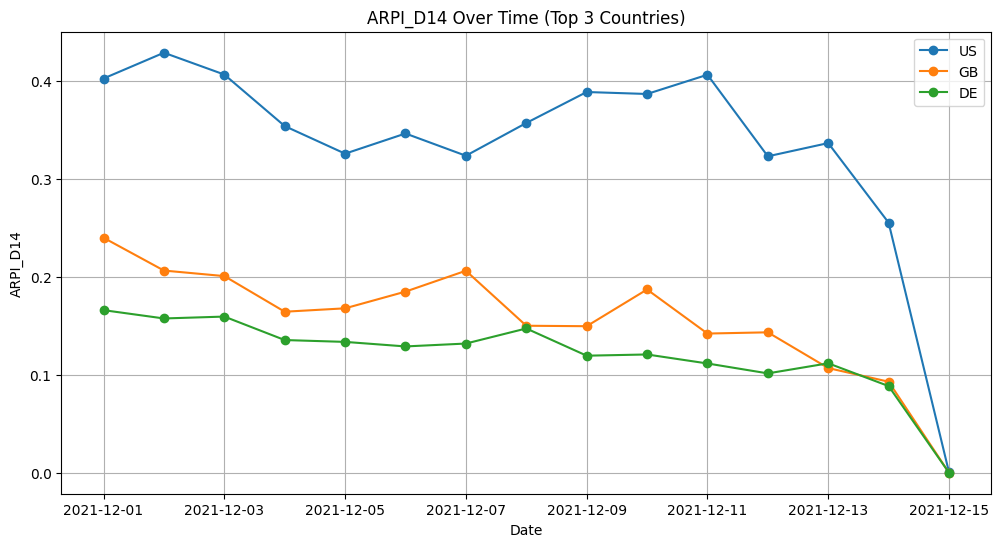

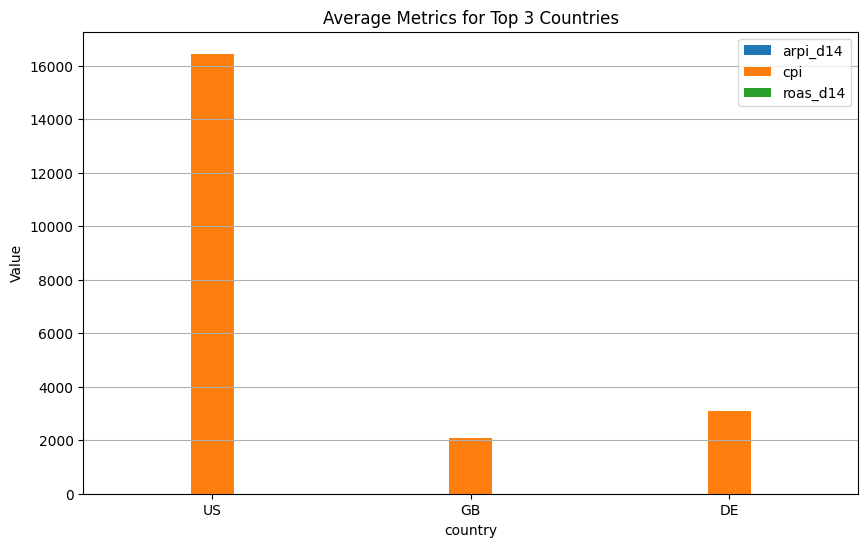

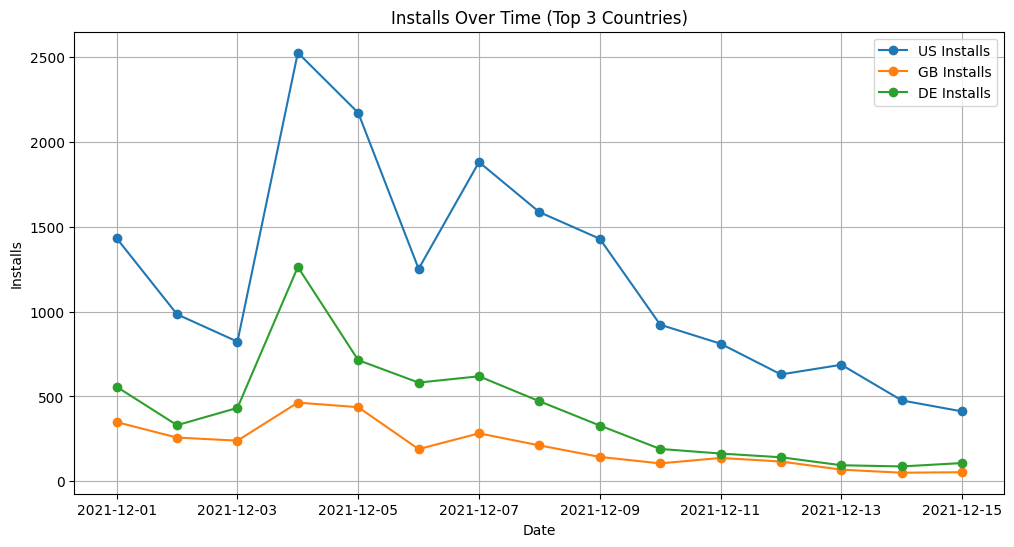

In [6]:
#%%
# EDA: Fruit Battle - Top 3 Countries by ARPI_D14 (01-12-2021 to 15-12-2021)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load summary.csv
df = pd.read_csv('summary.csv')

# Filter for Fruit Battle and date range
df_fb = df[
    (df['client'] == 'fruit_battle') &
    (df['year'] == 2021) &
    (df['month'] == 12) &
    (df['day'] >= 1) & (df['day'] <= 15)
]

# Compute average ARPI_D14 per country and pick top 3
country_arpi = df_fb.groupby('country')['arpi_d14'].mean().sort_values(ascending=False)
top3_countries = country_arpi.head(3).index.tolist()
df_top3 = df_fb[df_fb['country'].isin(top3_countries)]

#%%
# Bullet point analysis
print("## Analysis of Top 3 Countries by ARPI_D14\n")
for country in top3_countries:
    avg_arpi = country_arpi[country]
    total_installs = df_top3[df_top3['country'] == country]['installs'].sum()
    avg_cpi = df_top3[df_top3['country'] == country]['cpi'].mean()
    avg_roas = df_top3[df_top3['country'] == country]['roas_d14'].mean()
    print(f"- {country}:")
    print(f"  - Highest average ARPI_D14: {avg_arpi:.3f}")
    print(f"  - Total installs: {total_installs}")
    print(f"  - Average CPI: {avg_cpi:.3f}")
    print(f"  - Average ROAS_D14: {avg_roas:.5f}")

#%%
# Visualize ARPI_D14 trends over time for top 3 countries
plt.figure(figsize=(12,6))
for country in top3_countries:
    country_data = df_top3[df_top3['country'] == country]
    plt.plot(
        pd.to_datetime(country_data[['year', 'month', 'day']]),
        country_data['arpi_d14'],
        marker='o',
        label=country
    )
plt.title('ARPI_D14 Over Time (Top 3 Countries)')
plt.xlabel('Date')
plt.ylabel('ARPI_D14')
plt.legend()
plt.grid(True)
plt.show()

#%%
# Barplot: Average ARPI_D14, CPI, and ROAS_D14 for Top 3 Countries
metrics = df_top3.groupby('country')[['arpi_d14', 'cpi', 'roas_d14']].mean().loc[top3_countries]
metrics.plot(kind='bar', figsize=(10,6))
plt.title('Average Metrics for Top 3 Countries')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

#%%
# Installs and Ad Spend trends
fig, ax1 = plt.subplots(figsize=(12,6))
for country in top3_countries:
    country_data = df_top3[df_top3['country'] == country]
    ax1.plot(
        pd.to_datetime(country_data[['year', 'month', 'day']]),
        country_data['installs'],
        marker='o',
        label=f'{country} Installs'
    )
ax1.set_ylabel('Installs')
ax1.set_xlabel('Date')
ax1.legend()
plt.title('Installs Over Time (Top 3 Countries)')
plt.grid(True)
plt.show()


In [12]:

#%%
"""
## Recommendations for Next Steps

- Increase marketing spend in US, DE and GB , the top-performing countries to leverage high ARPI_D14 and ROAS_D14, as shown in the bar plots.
- Monitor CPI and ROAS_D14 to ensure marketing efficiency remains high as spend increases.
- Analyze user behavior in these countries to identify drivers of high ARPI_D14 and replicate successful strategies elsewhere.
- Experiment with new ad creatives and channels to further optimize CPI and maximize installs.
- Watch for signs of market saturation in installs and ARPI_D14 trends to optimize future campaigns.
"""
#%%

'\n## Recommendations for Next Steps\n\n- Increase marketing spend in US, DE and GB , the top-performing countries to leverage high ARPI_D14 and ROAS_D14, as shown in the bar plots.\n- Monitor CPI and ROAS_D14 to ensure marketing efficiency remains high as spend increases.\n- Analyze user behavior in these countries to identify drivers of high ARPI_D14 and replicate successful strategies elsewhere.\n- Experiment with new ad creatives and channels to further optimize CPI and maximize installs.\n- Watch for signs of market saturation in installs and ARPI_D14 trends to optimize future campaigns.\n'